# **Part 1: Laptop Price Analysis**
Aim:  To analyze and predict laptop prices using a dataset containing laptop specifications. It is a simple regression task where we predict the price of a laptop based on its features like brand, processor, RAM, storage, etc.

## 1. Data pre-processing

In [ ]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the Dataset
data = pd.read_csv('laptop_prices.csv')

In [ ]:
# Display basic information about the dataset
print(data.info())
print(data.describe())

# Check for missing values and handle them (drop or impute)
data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

## 2. Exploratory Data Analysis (EDA)

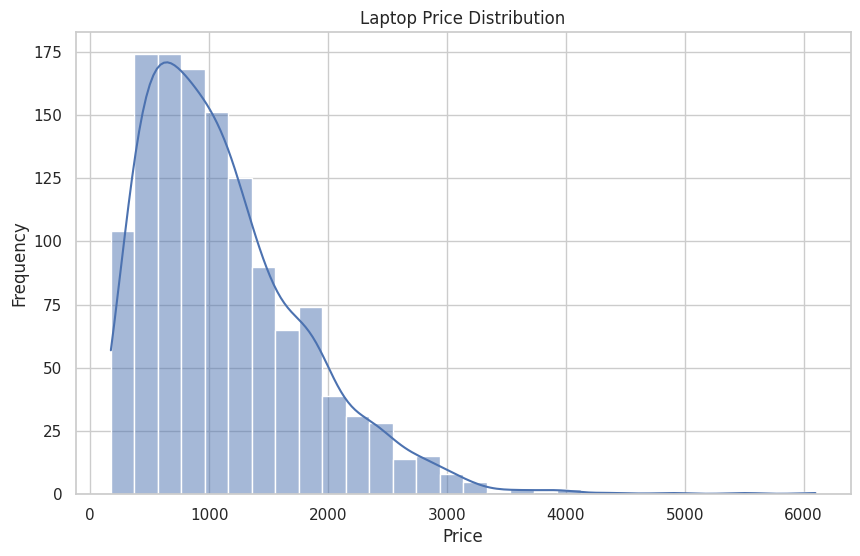

<ipython-input-4-df061b689d39>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="viridis")


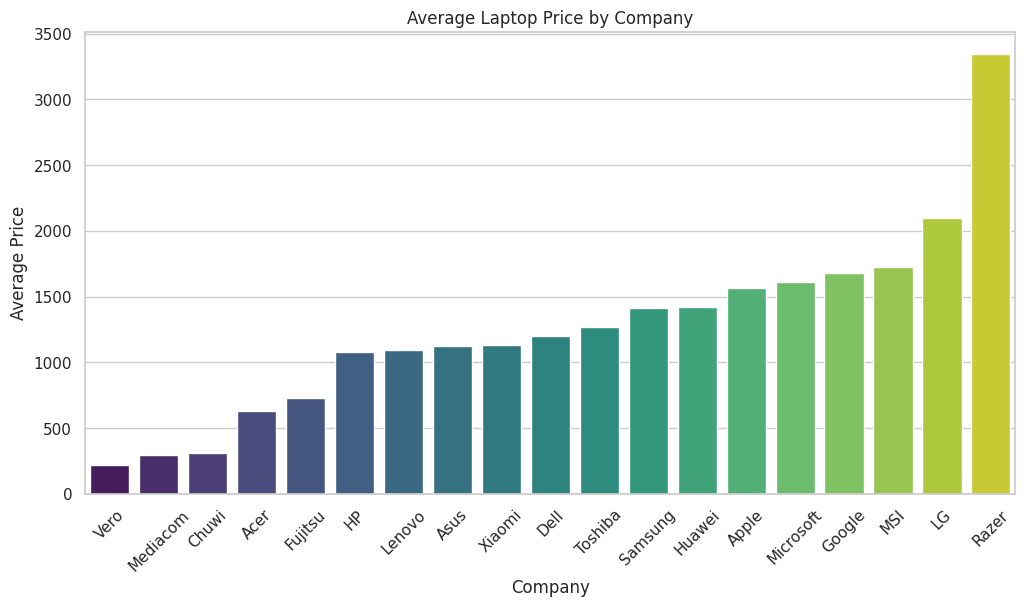

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 23.7% of the points cannot be plac

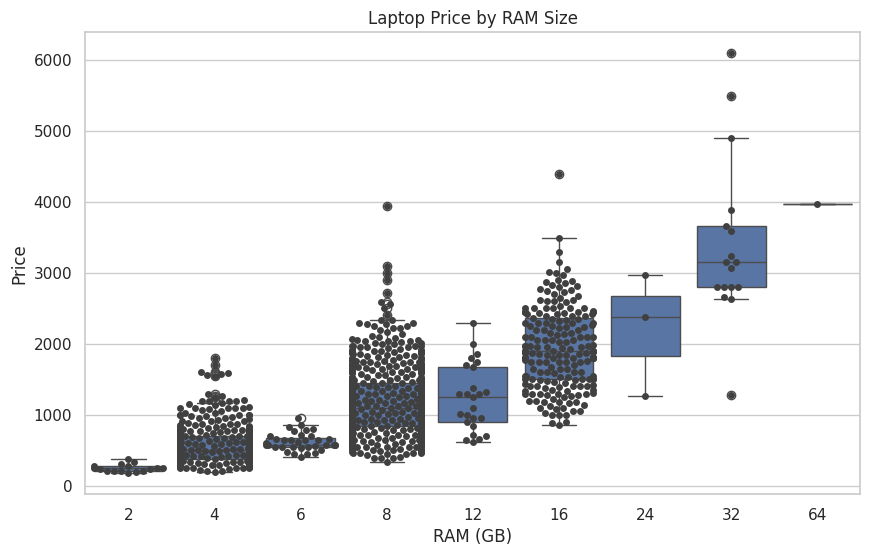

<ipython-input-4-df061b689d39>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='CPU_model', y='Price_euros', data=data, capsize=.2, palette="viridis")


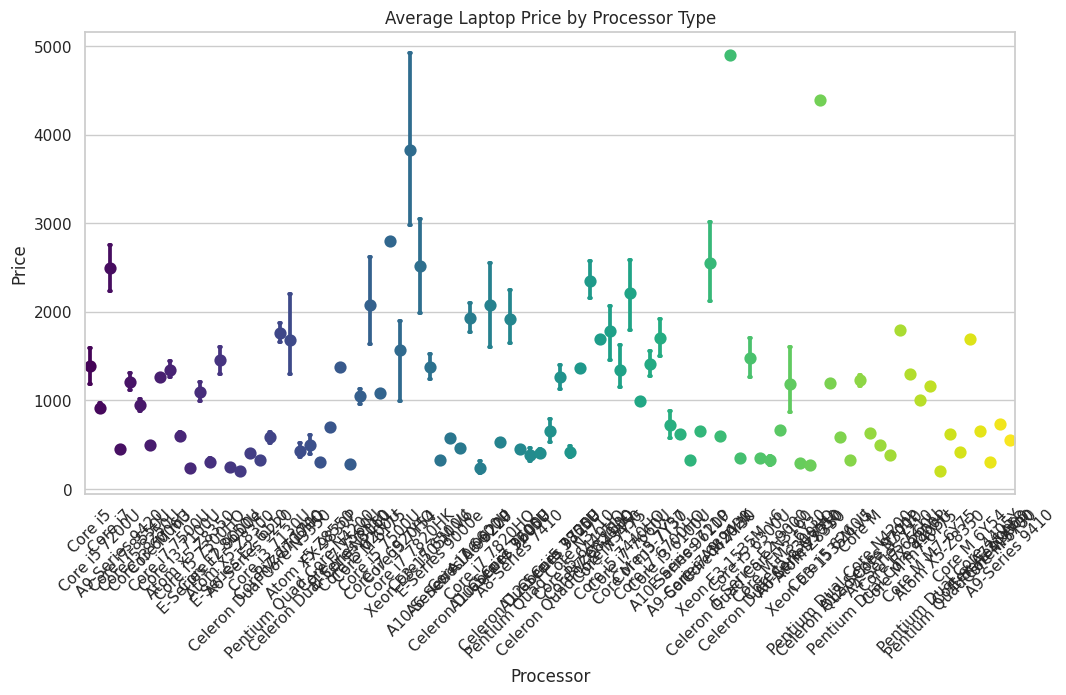

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Plot Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Price_euros'], bins=30, kde=True)
plt.title('Laptop Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Average Price by Brand
plt.figure(figsize=(12, 6))
brand_avg_price = data.groupby('Company')['Price_euros'].mean().sort_values()
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="viridis")
plt.title('Average Laptop Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# 3. Price vs. RAM
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ram', y='Price_euros', data=data)
sns.swarmplot(x='Ram', y='Price_euros', data=data, color=".25")
plt.title('Laptop Price by RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()

# 4. Price vs. Processor
plt.figure(figsize=(12, 6))
sns.pointplot(x='CPU_model', y='Price_euros', data=data, capsize=.2, palette="viridis")
plt.title('Average Laptop Price by Processor Type')
plt.xlabel('Processor')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


## 3. Prepare Data for Modeling

In [ ]:
# Encoding categorical features
data = pd.get_dummies(data, columns=['Product', 'CPU_model'], drop_first=True)

# Encode 'Screen' column if it contains text values
if data['Screen'].dtype == object:
    label_encoder = LabelEncoder()
    data['Screen'] = label_encoder.fit_transform(data['Screen'])

# Define features (X) and target variable (y)
X = data[['Ram', 'PrimaryStorage', 'Screen'] + [col for col in data.columns if 'Product_' in col or 'CPU_model_' in col]]
y = data['Price_euros']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Train a Linear Regression Model

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 101821.80
R² Score: 0.79


## 5. Visualization of Actual vs Predicted Prices

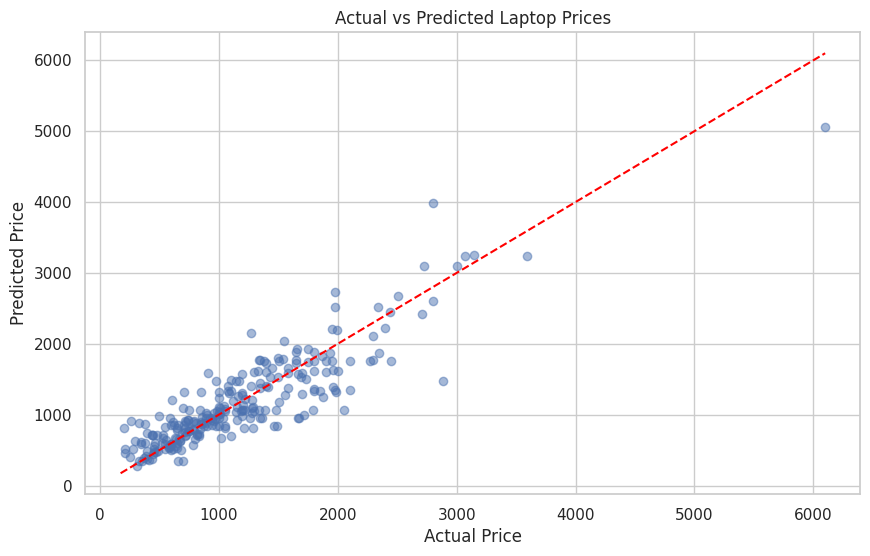

In [ ]:
# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.title('Actual vs Predicted Laptop Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


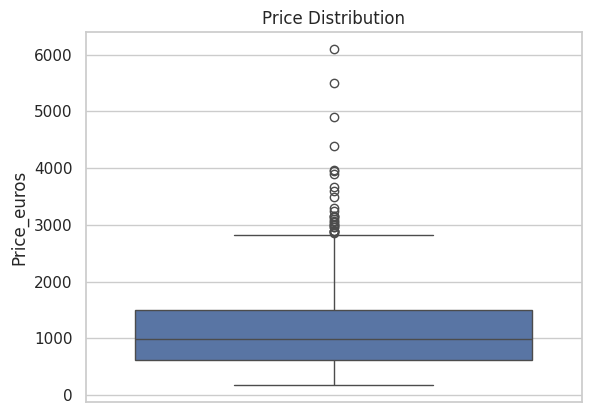

In [ ]:
sns.boxplot(data['Price_euros'])
plt.title('Price Distribution')
plt.show()


# Part 2: Laptop Price Analysis

Mean Squared Error: 101821.80
R² Score: 0.79


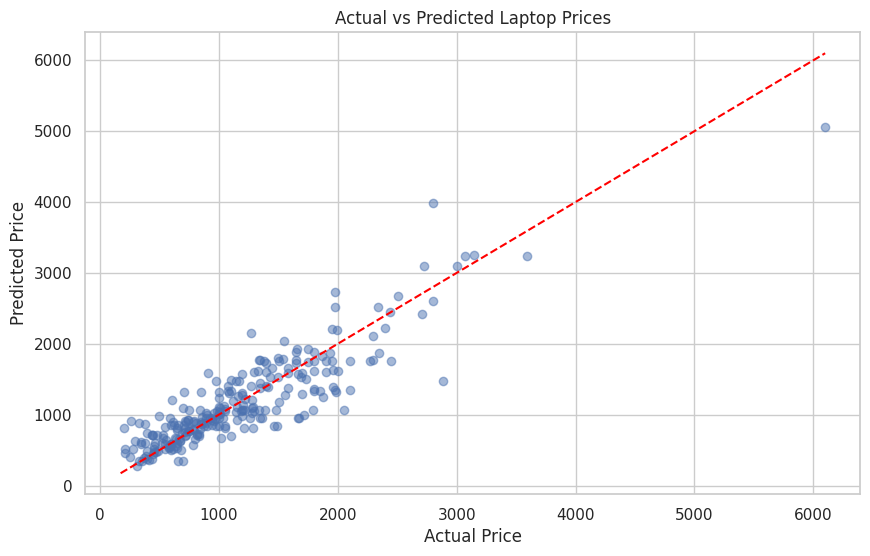

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the Dataset
data = pd.read_csv('laptop_prices.csv')

# Encoding categorical features on the entire dataset
data = pd.get_dummies(data, columns=['Product', 'CPU_model'], drop_first=True)

# Encode 'Screen' column if it contains text values
if data['Screen'].dtype == object:
    label_encoder = LabelEncoder()
    data['Screen'] = label_encoder.fit_transform(data['Screen'])

# Define features (X) and target variable (y)
X = data[['Ram', 'PrimaryStorage', 'Screen'] + [col for col in data.columns if 'Product_' in col or 'CPU_model_' in col]]
y = data['Price_euros']

# Check for missing values and handle them if needed
X = X.fillna(0)
y = y.fillna(y.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.title('Actual vs Predicted Laptop Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


# Using Random Forest

Random Forest - Mean Squared Error: 82163.80
Random Forest - R² Score: 0.83


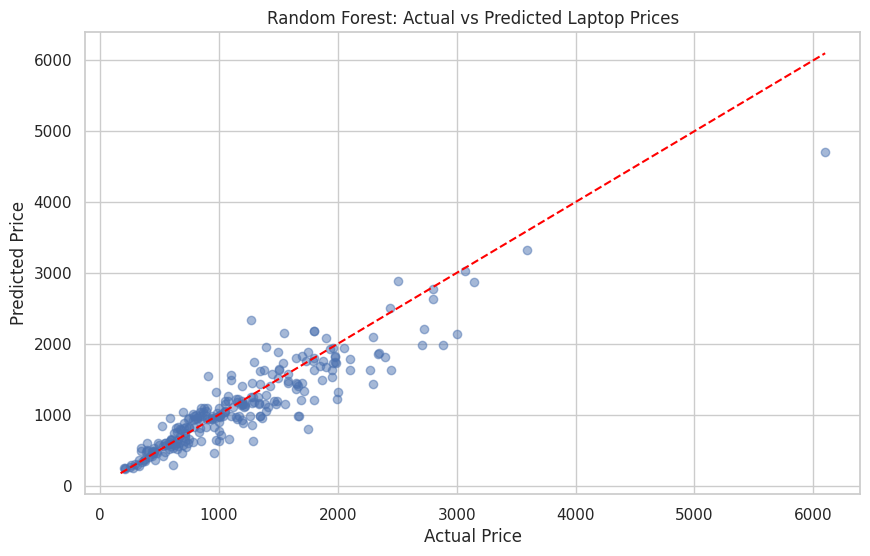

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the Dataset
data = pd.read_csv('laptop_prices.csv')

# Encode categorical features
data = pd.get_dummies(data, columns=['Product', 'CPU_model'], drop_first=True)

# Encode 'Screen' column if it contains text values
if data['Screen'].dtype == object:
    label_encoder = LabelEncoder()
    data['Screen'] = label_encoder.fit_transform(data['Screen'])

# Define features (X) and target variable (y)
X = data[['Ram', 'PrimaryStorage', 'Screen'] + [col for col in data.columns if 'Product_' in col or 'CPU_model_' in col]]
y = data['Price_euros']

# Handle missing values if any
X = X.fillna(0)
y = y.fillna(y.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - R² Score: {r2_rf:.2f}")

# Plotting Actual vs Predicted Prices for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.title('Random Forest: Actual vs Predicted Laptop Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


# Gradient Boosting Regressor

Gradient Boosting - Mean Squared Error: 99430.72
Gradient Boosting - R² Score: 0.80


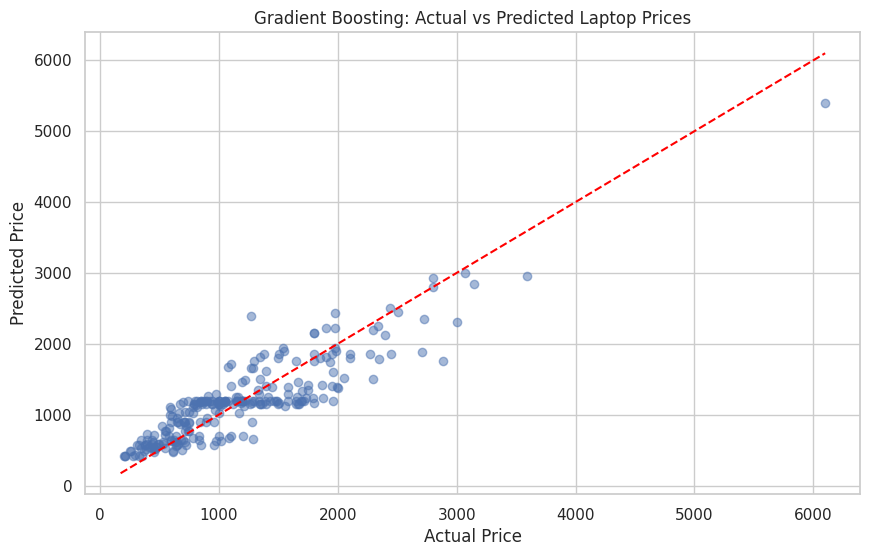

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error: {mse_gb:.2f}")
print(f"Gradient Boosting - R² Score: {r2_gb:.2f}")

# Plotting Actual vs Predicted Prices for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.title('Gradient Boosting: Actual vs Predicted Laptop Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()
